##Extracting datas and importing packpages

Após a instalação, reinicie o runtime 

In [2]:
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install geocoder==1.38.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 3.4 MB/s eta 0:00:00


In [9]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=12068374 sha256=cdf5f1dc681b6095a4b245ec6bdb41cfea82c6b8aa6d5aea082884e2945c47a8
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires matplotlib>=3.2, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=

In [1]:
#importing packpages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [2]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ

Downloading...
From: https://drive.google.com/uc?id=1D6jzFOjydIWJRsXe8wf_yTU7CkEGjaFZ
To: /content/dataset_flights_brazil.zip
100% 112M/112M [00:02<00:00, 49.3MB/s]


In [3]:
!unzip dataset_flights_brazil

Archive:  dataset_flights_brazil.zip
  inflating: README.md               
  inflating: requirements.txt        
  inflating: transform_to_airports_csv.py  
  inflating: transform_to_anac_csv.py  
  inflating: transform_to_graphml.py  
   creating: .git/
  inflating: .git/config             
  inflating: .git/description        
  inflating: .git/HEAD               
   creating: .git/hooks/
  inflating: .git/hooks/applypatch-msg.sample  
  inflating: .git/hooks/commit-msg.sample  
  inflating: .git/hooks/fsmonitor-watchman.sample  
  inflating: .git/hooks/post-update.sample  
  inflating: .git/hooks/pre-applypatch.sample  
  inflating: .git/hooks/pre-commit.sample  
  inflating: .git/hooks/pre-merge-commit.sample  
  inflating: .git/hooks/pre-push.sample  
  inflating: .git/hooks/pre-rebase.sample  
  inflating: .git/hooks/pre-receive.sample  
  inflating: .git/hooks/prepare-commit-msg.sample  
  inflating: .git/hooks/push-to-checkout.sample  
  inflating: .git/hooks/update.sample  
  

In [4]:
# download csv files from sources
!python3 extract.py

# transform to final files
!python3 transform_to_anac_csv.py
!python3 transform_to_airports_csv.py
!python3 transform_to_graphml.py

100% 24/24 [04:17<00:00, 10.74s/it]


##Processing data

In [5]:
air_data = 'data/air_traffic.graphml'

In [6]:
G = nx.read_graphml(air_data)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 1116 nodes and 10048 edges


In [7]:
G.nodes(data=True)

NodeDataView({'KDFW': {'name': 'DALLAS & FORT WORTH, TEXAS', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 32.896801, 'longitude': -97.038002}, 'KJFK': {'name': 'NEW YORK, NEW YORK', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 40.639801, 'longitude': -73.7789}, 'KMIA': {'name': 'MIAMI, FLORIDA', 'region': nan, 'country': 'ESTADOS UNIDOS DA AMÉRICA', 'latitude': 25.79319953918457, 'longitude': -80.29060363769531}, 'SBGL': {'name': 'RIO DE JANEIRO', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458}, 'SBGR': {'name': 'GUARULHOS', 'region': 'SUDESTE', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289}, 'SGAS': {'name': 'ASUNCIÓN', 'region': nan, 'country': 'PARAGUAI', 'latitude': -25.239999771118164, 'longitude': -57.52000045776367}, 'nan': {'name': nan, 'region': nan, 'country': nan, 'latitude': -26.875556, 'longitude': -52.373056}, 'SSBG': {'name': 'BENTO GONÇA

In [8]:
for node in G.nodes:
  if pd.isna(G.nodes[node]['region']):
    G.nodes[node]['region'] = 'INTERNACIONAL'

In [9]:
check = set()
for node in G.nodes:
  check.add(G.nodes[node]['region'])
print(check)

{'INTERNACIONAL', ' ', 'SUL', 'NORTE', 'CENTRO-OESTE', 'NORDESTE', 'NÃO IDENTIFICADO', 'SUDESTE'}


In [10]:
nodes_BR = []
for node in G.nodes:
  if G.nodes[node]['region'] != 'INTERNACIONAL' and G.nodes[node]['region'] != ' ' and G.nodes[node]['region'] != 'NÃO IDENTIFICADO':
    nodes_BR.append(node)

In [11]:
G_BR = G.subgraph(nodes_BR)

In [12]:
print("The network has {} nodes and {} edges".format(G_BR.number_of_nodes(),
                                                     G_BR.number_of_edges()))

The network has 505 nodes and 4514 edges


In [13]:
check = set()
for node in G_BR.nodes:
  check.add(G_BR.nodes[node]['region'])
print(check)

{'NORTE', 'SUL', 'CENTRO-OESTE', 'NORDESTE', 'SUDESTE'}


In [14]:
nx.write_graphml(G_BR, path=air_data)

In [15]:
G = nx.read_graphml(air_data)
print("The network has {} nodes and {} edges".format(G.number_of_nodes(),
                                                     G.number_of_edges()))

The network has 505 nodes and 4514 edges


##Assortativity

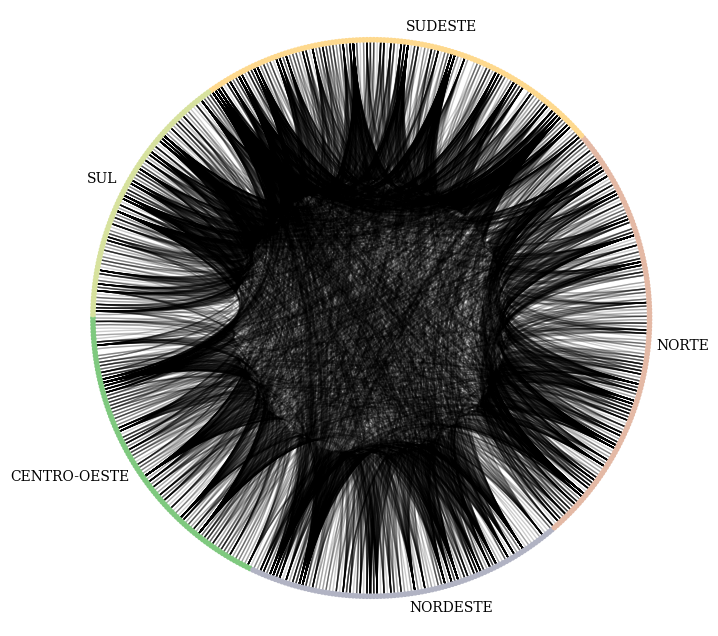

In [17]:
# create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

In [27]:
nx.attribute_assortativity_coefficient(G, 'region') # assortativity, because the coef > 0

0.37291232237638355

In [18]:
nx.attribute_mixing_matrix(G, 'region')

array([[0.13203367, 0.00719982, 0.0231502 , 0.02027027, 0.02758086],
       [0.00719982, 0.07266283, 0.01207355, 0.01351351, 0.04031901],
       [0.0231502 , 0.01207355, 0.05383252, 0.01063358, 0.03411608],
       [0.02027027, 0.01351351, 0.01063358, 0.08263181, 0.05460789],
       [0.02758086, 0.04031901, 0.03411608, 0.05460789, 0.17190961]])

In [19]:
north = []
northeast = []
south = []
southeast = []
central_west = []

for node in G.nodes:
  if G.nodes[node]['region'] == 'NORTE':
    north.append(node)
  elif G.nodes[node]['region'] == 'NORDESTE':
    northeast.append(node)
  elif G.nodes[node]['region'] == 'SUL':
    south.append(node)
  elif G.nodes[node]['region'] == 'SUDESTE':
    southeast.append(node)
  elif G.nodes[node]['region'] == 'CENTRO-OESTE':
    central_west.append(node)

In [20]:
G_north = G.subgraph(north)
G_northeast = G.subgraph(northeast)
G_south = G.subgraph(south)
G_southeast = G.subgraph(southeast)
G_central_west = G.subgraph(central_west)

##Bivariate

In [21]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,48,79.170833
1,8,58.713235
2,3,73.042735
3,2,77.407143
4,14,64.059524


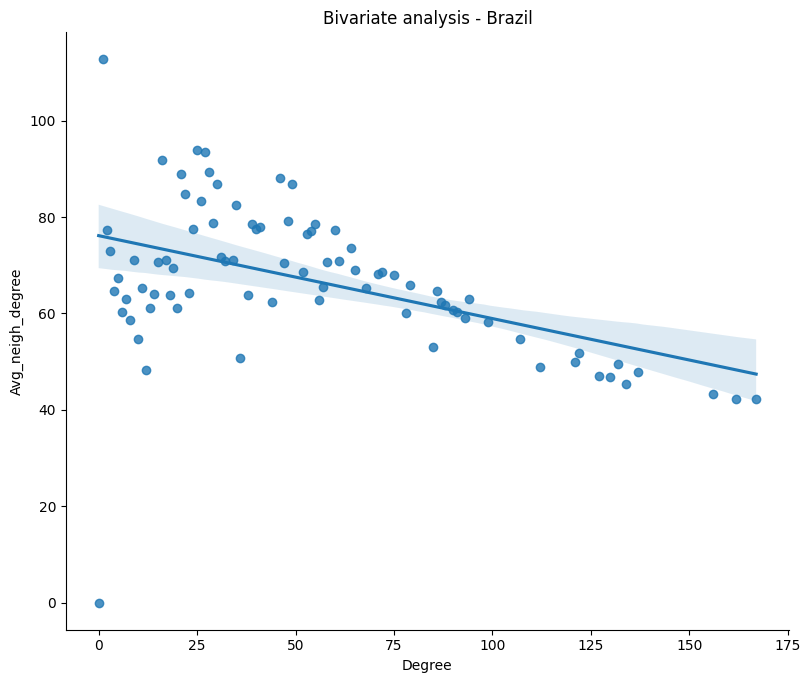

In [22]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Brazil')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [23]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_north).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,13,20.461538
1,12,23.875000
2,1,52.714286
3,18,21.736111
4,2,32.750000


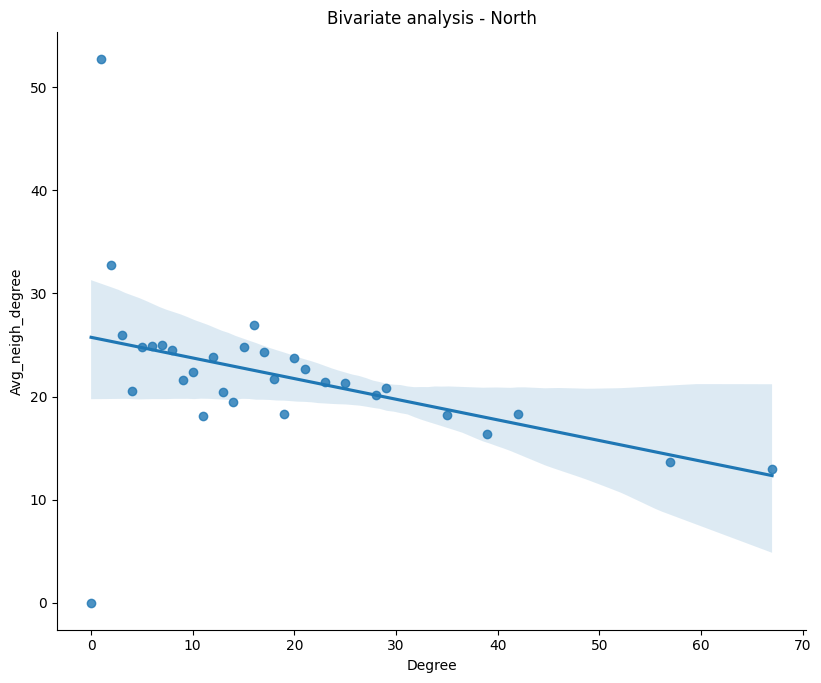

In [24]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - North')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [25]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_northeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,3,26.500000
1,4,22.333333
2,2,25.736842
3,1,40.250000
4,14,24.214286


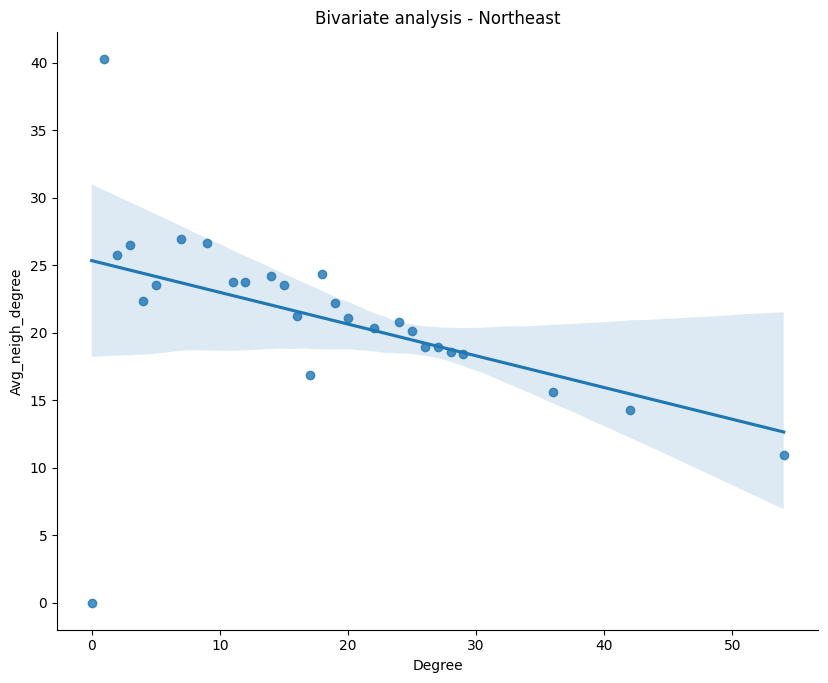

In [26]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Northeast')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [27]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_south).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,6,23.333333
1,3,28.666667
2,21,19.357143
3,0,0.000000
4,1,42.166667


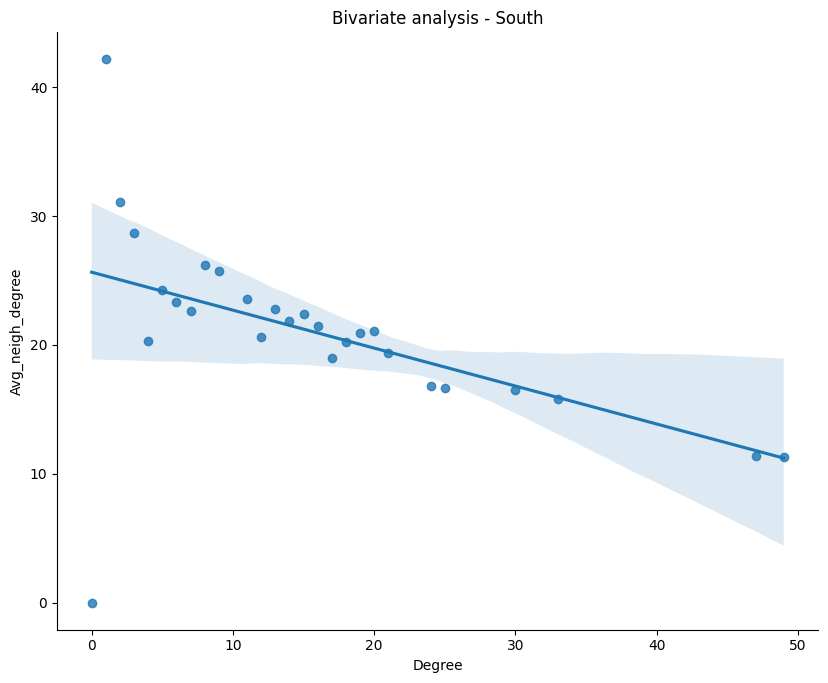

In [28]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - South')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [29]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_southeast).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,2,47.100000
1,17,32.264706
2,23,36.231884
3,8,30.187500
4,16,38.656250


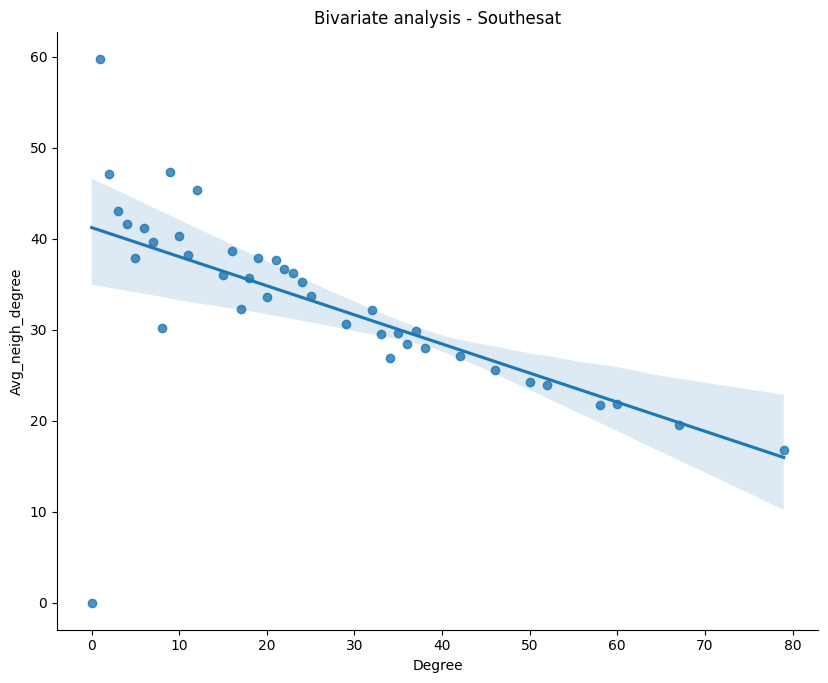

In [30]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Southesat')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

In [31]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G_central_west).items())
dic = {
    'Degree': degree,
    'Avg_neigh_degree': avg_neigh_degree
}
data = pd.DataFrame(dic)
data.head()

,Degree,Avg_neigh_degree
0,5,19.300000
1,2,21.166667
2,1,40.076923
3,42,6.500000
4,25,10.120000


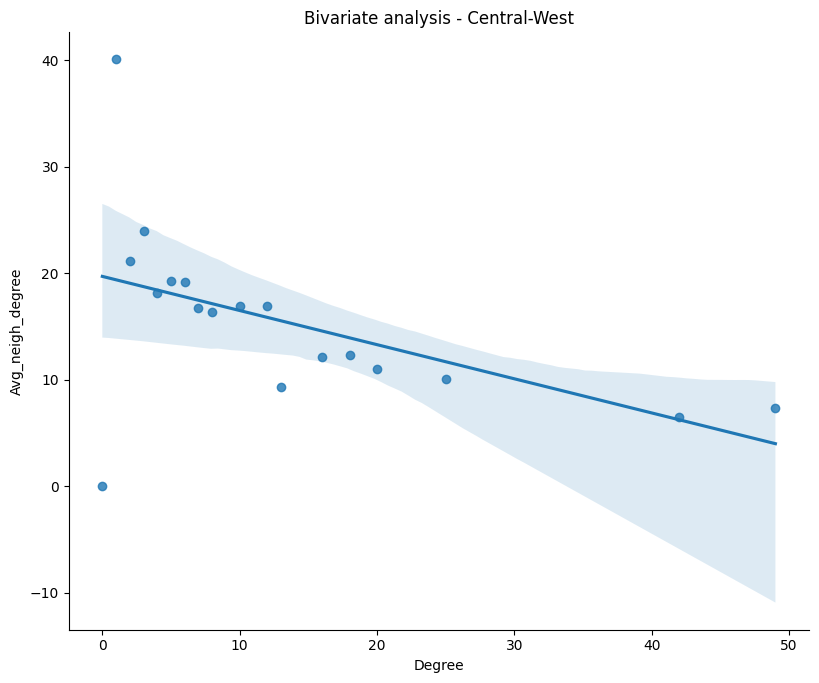

In [32]:
plot = sns.lmplot(data=data, x='Degree', y='Avg_neigh_degree').set(title='Bivariate analysis - Central-West')
plot.fig.set_figwidth(9)
plot.fig.set_figheight(7)

Degree assortativity for Brazil = -0.1943

Degree assortativity for North = -0.2204

Degree assortativity for Northeast = -0.3271

Degree assortativity for South = -0.3555

Degree assortativity for Southeast = -0.3596

Degree assortativity for Central-West = -0.3436



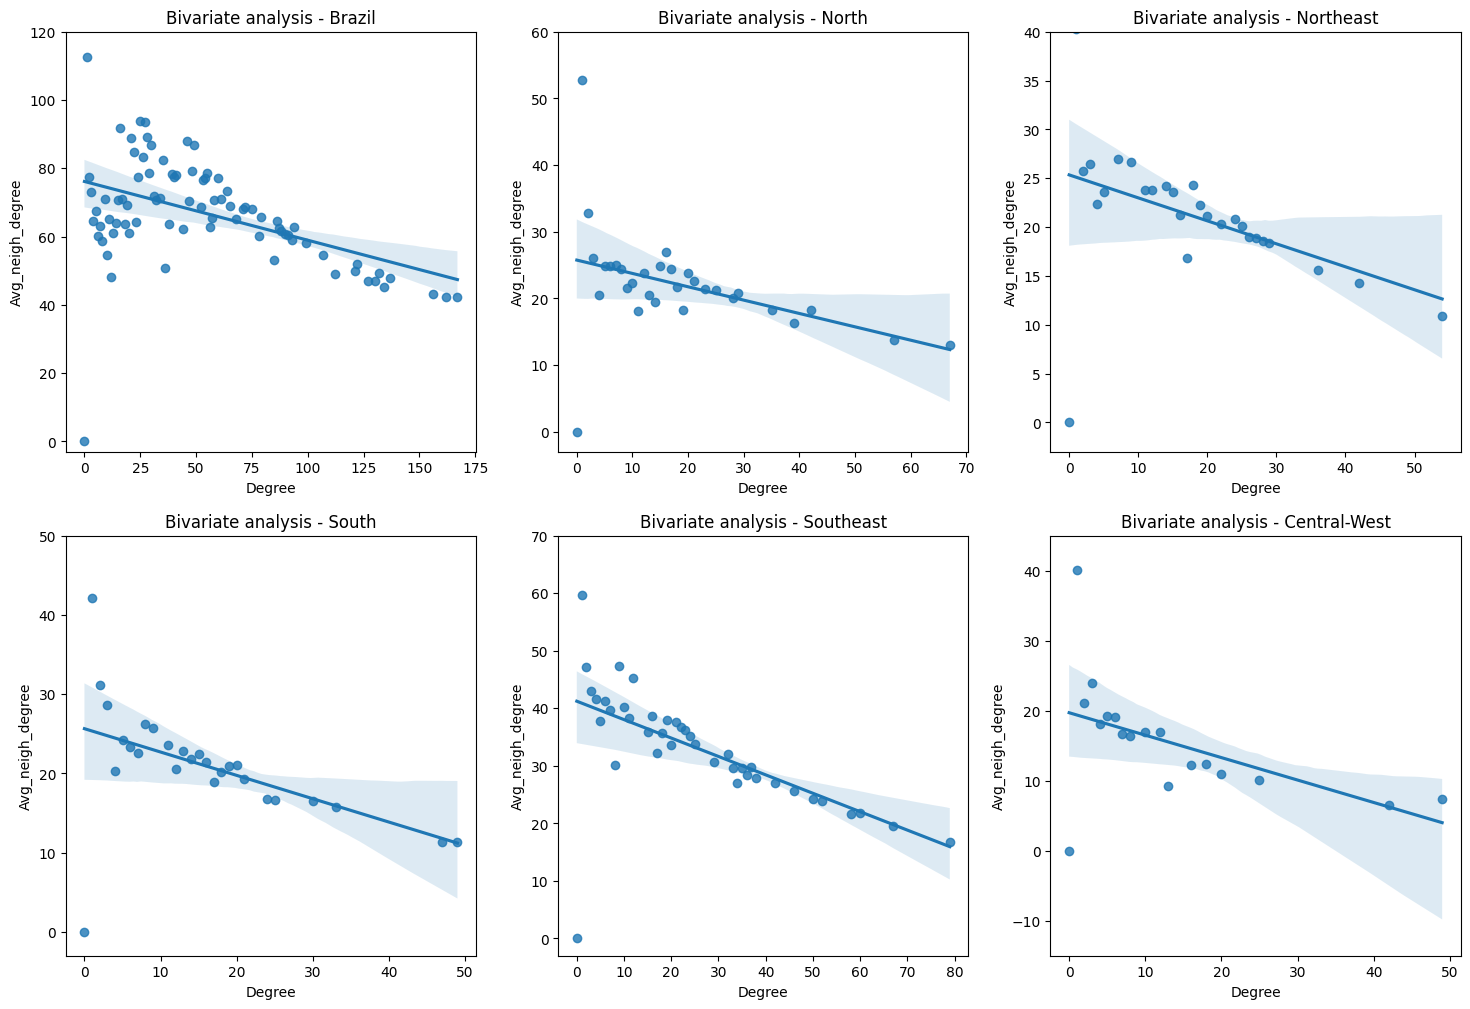

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

networks = [
    (G, 'Brazil', [-3, 120]),
    (G_north, 'North', [-3, 60]),
    (G_northeast, 'Northeast', [-3, 40]),
    (G_south, 'South', [-3, 50]),
    (G_southeast, 'Southeast', [-3, 70]),
    (G_central_west, 'Central-West', [-15, 45])
]

for i, (graph, name, limits) in enumerate(networks):
    row = i // 3
    col = i % 3

    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(graph).items())
    coef = round(nx.degree_assortativity_coefficient(graph), 4)
    print(f'Degree assortativity for {name} = {coef}\n')

    data = pd.DataFrame({'Degree': degree, 'Avg_neigh_degree': avg_neigh_degree})
    plot = sns.regplot(ax=axes[row, col], data=data, x='Degree', y='Avg_neigh_degree').set(title=f'Bivariate analysis - {name}')
    axes[row, col].set_ylim(limits[0], limits[1])


##Connected components


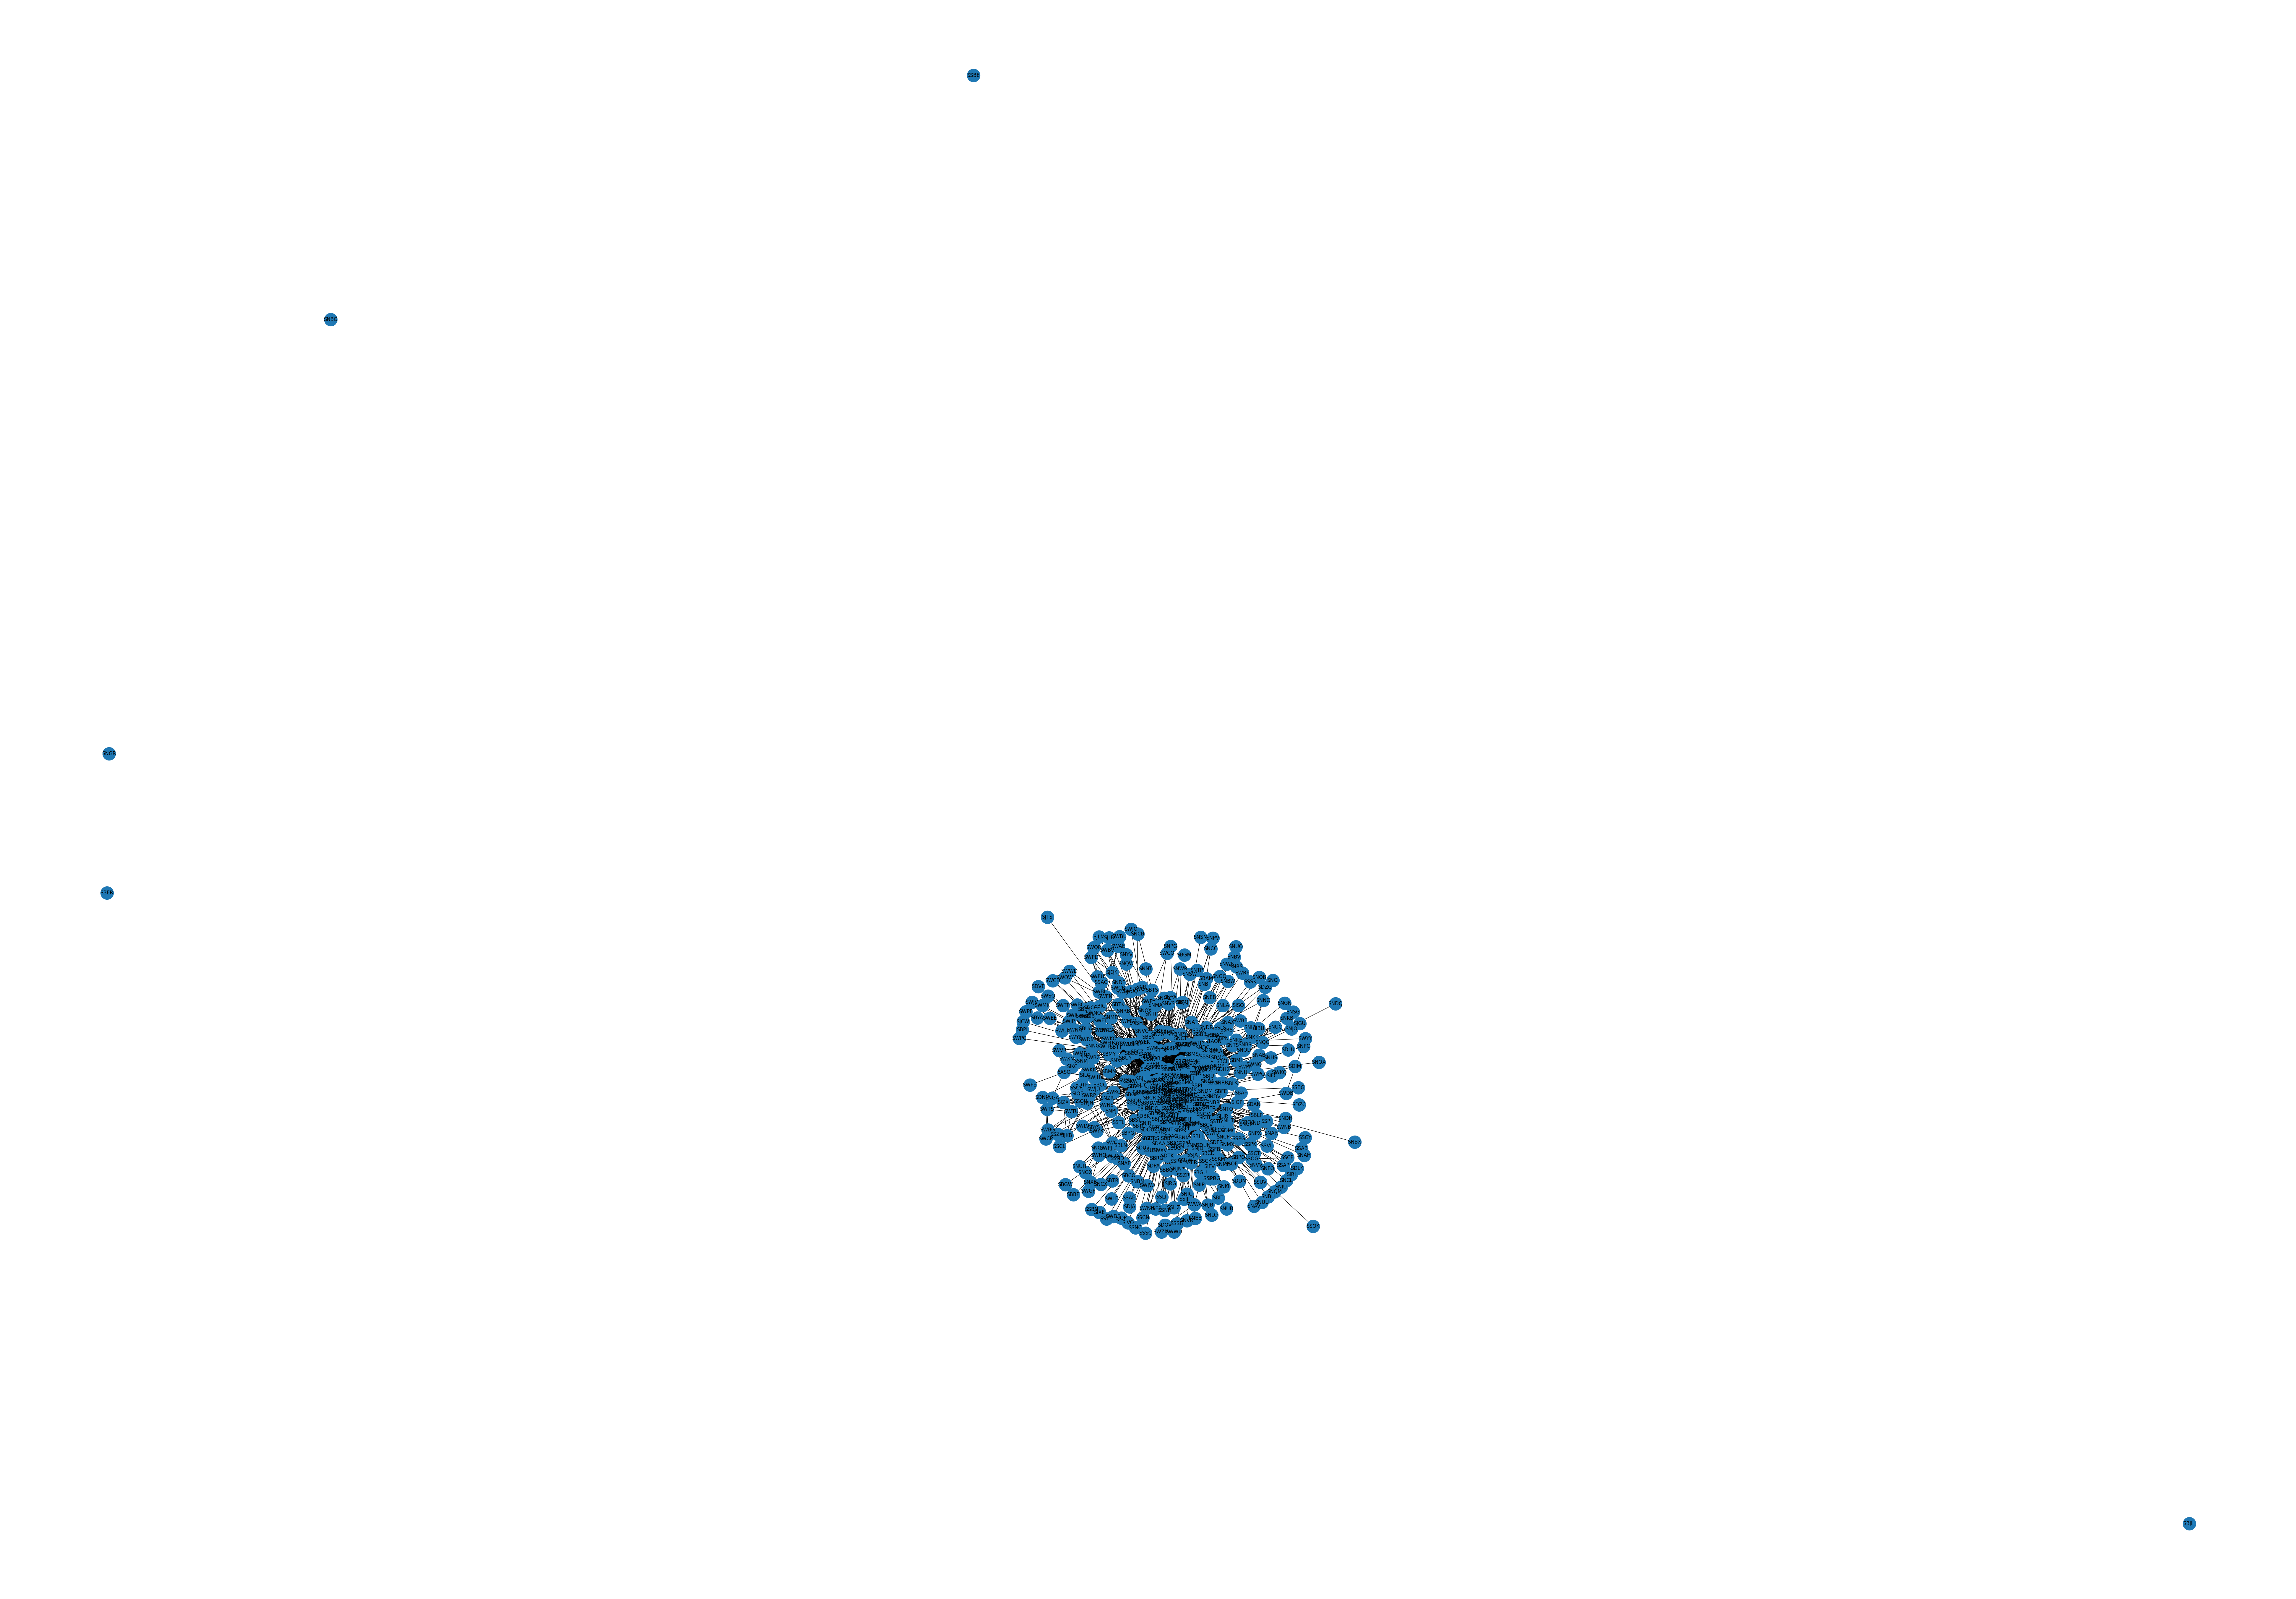

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(100,70))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

In [35]:
nx.is_connected(G)

False

In [36]:
nx.number_connected_components(G)

6

In [37]:
for node in G.nodes:
  print(G.nodes[node]['region'])

SUDESTE
SUL
NORDESTE
CENTRO-OESTE
NORTE
NORTE
NORTE
NORTE
CENTRO-OESTE
CENTRO-OESTE
SUDESTE
NORDESTE
NORTE
NORDESTE
CENTRO-OESTE
NORTE
CENTRO-OESTE
SUDESTE
CENTRO-OESTE
SUL
NORTE
CENTRO-OESTE
NORDESTE
SUL
SUDESTE
NORTE
NORTE
SUDESTE
SUDESTE
NORTE
SUL
NORTE
NORDESTE
NORTE
NORDESTE
NORTE
SUL
SUDESTE
CENTRO-OESTE
SUL
SUDESTE
SUDESTE
CENTRO-OESTE
SUL
SUL
SUDESTE
NORDESTE
SUL
CENTRO-OESTE
NORDESTE
SUL
NORDESTE
CENTRO-OESTE
SUL
SUDESTE
SUL
SUL
SUDESTE
SUL
SUDESTE
SUL
NORDESTE
NORTE
SUDESTE
NORDESTE
NORDESTE
NORTE
NORDESTE
NORTE
NORDESTE
SUL
NORTE
NORDESTE
NORTE
NORDESTE
NORDESTE
NORTE
CENTRO-OESTE
NORTE
CENTRO-OESTE
NORTE
NORDESTE
SUL
NORTE
SUDESTE
SUDESTE
SUL
CENTRO-OESTE
CENTRO-OESTE
NORTE
SUDESTE
NORDESTE
NORTE
SUL
SUDESTE
CENTRO-OESTE
SUDESTE
NORTE
SUL
NORTE
SUDESTE
NORDESTE
SUDESTE
SUDESTE
SUDESTE
NORTE
NORTE
SUDESTE
SUDESTE
NORTE
CENTRO-OESTE
SUDESTE
SUL
CENTRO-OESTE
SUDESTE
NORDESTE
CENTRO-OESTE
SUDESTE
SUDESTE
SUL
SUDESTE
NORTE
SUL
SUDESTE
SUDESTE
NORTE
NORTE
SUDESTE
SUL
NORDESTE
SUD

In [38]:
for component in nx.connected_components(G):
  print(component)

{'SBAU', 'SBBG', 'SIBU', 'SNMH', 'SWEI', 'SJGU', 'SNSH', 'SBMY', 'SWHP', 'SWCB', 'SWHG', 'SDTK', 'SNBI', 'SBPB', 'SNDB', 'SWJI', 'SWWU', 'SNGX', 'SWDB', 'SBRG', 'SWJP', 'SSCL', 'SNMU', 'SBPG', 'SNXB', 'SWUY', 'SWTP', 'SDCO', 'SBCP', 'SWPI', 'SBLO', 'SNDR', 'SNKE', 'SWAE', 'SBSL', 'SBRB', 'SSBN', 'SNYB', 'SWRP', 'SSFB', 'SNZR', 'SBBH', 'SWSI', 'SSBG', 'SSOK', 'SBVT', 'SBFZ', 'SJRG', 'SWCD', 'SNVB', 'SNEE', 'SBTC', 'SSJA', 'SBAS', 'SSCR', 'SSVI', 'SBJD', 'SSOE', 'SDIM', 'SSSB', 'SNIU', 'SBEG', 'SBAQ', 'SBKG', 'SIFC', 'SNSM', 'SNTS', 'SBTB', 'SBLP', 'SSER', 'SBAA', 'SBNT', 'SBUY', 'SBSV', 'SNJD', 'SBTF', 'SWPY', 'SWOB', 'SSTL', 'SNNC', 'SNQG', 'SBTR', 'SJLU', 'SBZM', 'SNNU', 'SBGS', 'SWEK', 'SWJU', 'SNBW', 'SBLS', 'SBVC', 'SBPJ', 'SBPA', 'SWPQ', 'SNKI', 'SNMX', 'SWFJ', 'SBSM', 'SBTU', 'SBGV', 'SNPP', 'SDDM', 'SBME', 'SWWD', 'SWEE', 'SBSC', 'SBBZ', 'SWPC', 'SBSO', 'SBSJ', 'SBFL', 'SWIQ', 'SBAF', 'SNJB', 'SWRD', 'SBPI', 'SNPY', 'SIXE', 'SDBK', 'SBBV', 'SSZR', 'SBCB', 'SBDN', 'SBPV', 'SNMZ',

In [39]:
region_counts = {'NORDESTE': 0, 'SUDESTE': 0, 'NORTE': 0, 'SUL': 0, 'CENTRO-OESTE': 0}

for component in nx.connected_components(G):
    for node in component:
        region = G.nodes[node]['region']
        if region in region_counts:
            region_counts[region] += 1

    total = sum(region_counts.values())

    print(component)
    for region, count in region_counts.items():
        print(f'{region}: {count}')
        percentage = count / total * 100
        print(f'{region}: {percentage:.2f}%')
    print('\n')

    region_counts = {'NORDESTE': 0, 'SUDESTE': 0, 'NORTE': 0, 'SUL': 0, 'CENTRO-OESTE': 0}


{'SBAU', 'SBBG', 'SIBU', 'SNMH', 'SWEI', 'SJGU', 'SNSH', 'SBMY', 'SWHP', 'SWCB', 'SWHG', 'SDTK', 'SNBI', 'SBPB', 'SNDB', 'SWJI', 'SWWU', 'SNGX', 'SWDB', 'SBRG', 'SWJP', 'SSCL', 'SNMU', 'SBPG', 'SNXB', 'SWUY', 'SWTP', 'SDCO', 'SBCP', 'SWPI', 'SBLO', 'SNDR', 'SNKE', 'SWAE', 'SBSL', 'SBRB', 'SSBN', 'SNYB', 'SWRP', 'SSFB', 'SNZR', 'SBBH', 'SWSI', 'SSBG', 'SSOK', 'SBVT', 'SBFZ', 'SJRG', 'SWCD', 'SNVB', 'SNEE', 'SBTC', 'SSJA', 'SBAS', 'SSCR', 'SSVI', 'SBJD', 'SSOE', 'SDIM', 'SSSB', 'SNIU', 'SBEG', 'SBAQ', 'SBKG', 'SIFC', 'SNSM', 'SNTS', 'SBTB', 'SBLP', 'SSER', 'SBAA', 'SBNT', 'SBUY', 'SBSV', 'SNJD', 'SBTF', 'SWPY', 'SWOB', 'SSTL', 'SNNC', 'SNQG', 'SBTR', 'SJLU', 'SBZM', 'SNNU', 'SBGS', 'SWEK', 'SWJU', 'SNBW', 'SBLS', 'SBVC', 'SBPJ', 'SBPA', 'SWPQ', 'SNKI', 'SNMX', 'SWFJ', 'SBSM', 'SBTU', 'SBGV', 'SNPP', 'SDDM', 'SBME', 'SWWD', 'SWEE', 'SBSC', 'SBBZ', 'SWPC', 'SBSO', 'SBSJ', 'SBFL', 'SWIQ', 'SBAF', 'SNJB', 'SWRD', 'SBPI', 'SNPY', 'SIXE', 'SDBK', 'SBBV', 'SSZR', 'SBCB', 'SBDN', 'SBPV', 'SNMZ',

##Shortest Path



Create a simulated scenario, where you want to take a trip with the following route:

    City 1 (North) to city 2 (South)
    City 2 (South) to city 3 (Northeast)
    City 3 (Northeast) to city 4 (Central-West)
    City 4 (Central-West) to city 5 (Southeast)



In [41]:
cities = {
    'North': 'SBAM', #City: AMAPÁ
    'Northeast': 'SBAR', #City: ARACAJÚ
    'South': 'SBBG', #City: BAGÉ
    'Southeast': 'SBCC', #City: CRICIÚMA
    'Central-West': 'SBBH' #City: BELO HORIZONTE
}

North to South

In [42]:
path1 = nx.shortest_path(G, cities['North'], cities['South'])
path1_len = nx.shortest_path_length(G, cities['North'], cities['South'])

c1 = G.nodes[path1[0]]['name']
c2 = G.nodes[path1[1]]['name'] 
c3 = G.nodes[path1[2]]['name'] 
c4 = G.nodes[path1[3]]['name']  

print(f'Shortest path from North to South: {path1}')
print(f'Shortest path length from North to South: {path1_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c4}')

Shortest path from North to South: ['SBAM', 'SBMQ', 'SBPA', 'SBBG']
Shortest path length from North to South: 3
Cities in this path: AMAPÁ -> MACAPÁ -> PORTO ALEGRE -> BAGÉ


South to Northeast

In [43]:
path2 = nx.shortest_path(G, cities['South'], cities['Northeast'])
path2_len = nx.shortest_path_length(G, cities['South'], cities['Northeast'])

c5 = G.nodes[path2[0]]['name']
c6 = G.nodes[path2[1]]['name'] 
c7 = G.nodes[path2[2]]['name'] 

print(f'Shortest path from South to Northeast: {path2}')
print(f'Shortest path length from South to Northeast: {path2_len}')
print(f'Cities in this path: {c5} -> {c6} -> {c7}')

Shortest path from South to Northeast: ['SBBG', 'SBPA', 'SBAR']
Shortest path length from South to Northeast: 2
Cities in this path: BAGÉ -> PORTO ALEGRE -> ARACAJU


Northeast to Central-West

In [44]:
path3 = nx.shortest_path(G, cities['Northeast'], cities['Central-West'])
path3_len = nx.shortest_path_length(G, cities['Northeast'], cities['Central-West'])

c8 = G.nodes[path3[0]]['name']
c9 = G.nodes[path3[1]]['name']

print(f'Shortest path from Northeast to Central-West: {path3}')
print(f'Shortest path length from Northeast to Central-West: {path3_len}')
print(f'Cities in this path: {c8} -> {c9}')

Shortest path from Northeast to Central-West: ['SBAR', 'SBBH']
Shortest path length from Northeast to Central-West: 1
Cities in this path: ARACAJU -> BELO HORIZONTE


Central-West to Southeast

In [45]:
path4 = nx.shortest_path(G, cities['Central-West'], cities['Southeast'])
path4_len = nx.shortest_path_length(G, cities['Central-West'], cities['Southeast'])

c10 = G.nodes[path4[0]]['name']
c11 = G.nodes[path4[1]]['name']

print(f'Shortest path from Central-West to Southeast: {path4}')
print(f'Shortest path length from Central-West to Southeast: {path4_len}')
print(f'Cities in this path: {c10} -> {c11}')

Shortest path from Central-West to Southeast: ['SBBH', 'SBEG', 'SBCC']
Shortest path length from Central-West to Southeast: 2
Cities in this path: BELO HORIZONTE -> MANAUS


Complete

In [46]:
path_comp = path1 + path2 + path3 + path4
path_comp_len = path1_len + path2_len + path3_len + path4_len

print(f'Shortest path from North -> South -> Northeast -> Central-West -> Southeast: {path_comp}')
print(f'Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: {path_comp_len}')
print(f'Cities in this path: {c1} -> {c2} -> {c3} -> {c5} -> {c6} -> {c8} -> {c9} -> {c11}')

Shortest path from North -> South -> Northeast -> Central-West -> Southeast: ['SBAM', 'SBMQ', 'SBPA', 'SBBG', 'SBBG', 'SBPA', 'SBAR', 'SBAR', 'SBBH', 'SBBH', 'SBEG', 'SBCC']
Shortest path length from North -> South -> Northeast -> Central-West -> Southeast: 8
Cities in this path: AMAPÁ -> MACAPÁ -> PORTO ALEGRE -> BAGÉ -> PORTO ALEGRE -> ARACAJU -> BELO HORIZONTE -> MANAUS


##Clustering coefficient

North

In [47]:
subgrafo_norte = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'NORTE'])

In [48]:
nx.clustering(subgrafo_norte)
nx.average_clustering(subgrafo_norte)

0.6259209801045801

Northeast

In [49]:
subgrafo_nordeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'NORDESTE'])

In [50]:
nx.clustering(subgrafo_nordeste)
nx.average_clustering(subgrafo_nordeste)

0.5016001281768834

Midwest





In [51]:
subgrafo_centroOeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'CENTRO-OESTE'])

In [52]:
nx.clustering(subgrafo_centroOeste)
nx.average_clustering(subgrafo_centroOeste)

0.5556488814335723

Southeast

In [53]:
subgrafo_sudeste = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'SUDESTE'])

In [54]:
nx.clustering(subgrafo_sudeste)
nx.average_clustering(subgrafo_sudeste)

0.6147935384470572

South

In [55]:
subgrafo_sul = G.subgraph([node for node, attr in G.nodes(data=True) if attr['region'] == 'SUL'])

In [56]:
nx.clustering(subgrafo_sul)
nx.average_clustering(subgrafo_sul)

0.5848627053938165